## Entanglement Entropy of pure states & The page curve

This test shows how to extract the purity $p_2=\mathrm{Tr}(\rho^2)$ and second R\'enyi entropy $S=-\log_2(p_2)$ from randomized measurements [Brydges et al Science 2019](https://doi.org/10.1126/science.aau4963). 

This is illustrated in the context of the Page curve of Haar pure random states: The curve of the entropy $S$ of reduced systems is expected to show a triangular shape as a function of system size.

In [1]:
using ITensors,ITensorMPS
using RandomMeas
using ProgressMeter

First we load in memory a random quantum state and calculates the purities accross different cuts

In [2]:
N  = 6 #number of qubits
χ = 2^(N÷2) #a large bond-dimension to consider a typical random state
ξ = siteinds("Qubit", N)
ψ = random_mps(ξ; linkdims=χ);

In [3]:
p = zeros(N)
for NA in 1:N
    spec = get_spectrum(ψ,NA)
    p[NA] = get_moment(spec,2)[1]
end
println("purities ", p);

purities [0.5257451920668621, 0.4102201448865293, 0.3406987169890165, 0.33513370752171534, 0.5223078777899072, 0.9999999999999991]


Then we sample randomized measurements 

In [5]:
ITensors.disable_warn_order()
nu=100
NM=100
data = zeros(Int8,(nu,NM,N))
@showprogress dt=1 for r in 1:nu
    u = get_rotations(ξ,1) #Haar rotations in A
    data[r,:,:] = get_RandomMeas(ψ,u,NM)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36


In [6]:
ps = zeros(N)
@showprogress dt=1 for NA in 1:N
        ps[NA] = get_purity_hamming(data[:,:,1:NA],ξ[1:NA])
end
println("estimated purities ",ps);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


estimated purities [0.52650303030303, 0.4171454545454546, 0.3508727272727275, 0.3509030303030303, 0.47123030303030283, 0.9940787878787876]


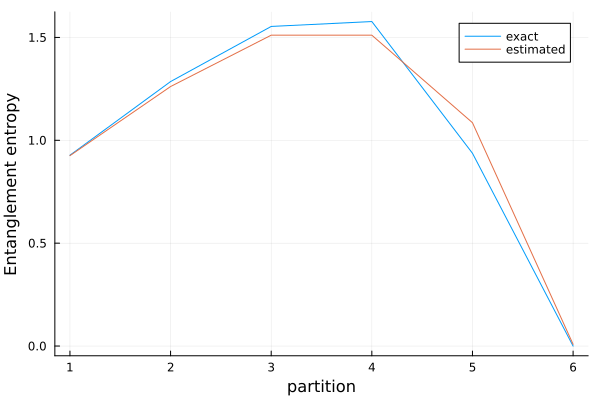

In [7]:
using Plots
Plots.plot(-log2.(p),label="exact")
Plots.plot!(-log2.(ps),label="estimated")
xlabel!("partition")
ylabel!("Entanglement entropy")
#legend()